In [20]:
import pandas as pd
import os
os.getcwd()
bank_df = pd.read_csv('../data/bank-prep.csv', sep=',')
#C:\\Users\\user\\Desktop\\AI 실습\\파이썬데이터 분석\\data\\bank-prep.csv
bank_df.head()

,age,default,balance,loan,day,duration,campaign,pdays,previous,y,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,0,5,261,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,5,348,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,0,5,365,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,5,1666,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,5,145,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(bank_df)

bank_df_sc = pd.DataFrame(sc.transform(bank_df), columns=bank_df.columns)

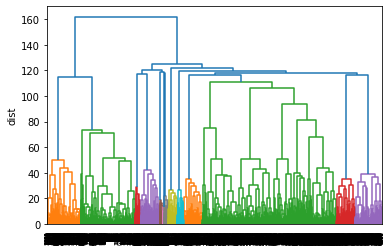

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt

hcls = linkage(bank_df_sc, metric='euclidean', method='ward')
dendrogram(hcls)

plt.ylabel('dist')
plt.show()

In [12]:
from scipy.cluster.hierarchy import fcluster

cst_group = fcluster(hcls, 100, criterion='distance')
print(cst_group)

[ 2  2  2 ... 15 15 15]


In [13]:
from sklearn.cluster import KMeans

kcls = KMeans(n_clusters=10)
cst_group = kcls.fit_predict(bank_df_sc)

print(cst_group)

[0 0 0 ... 2 2 2]


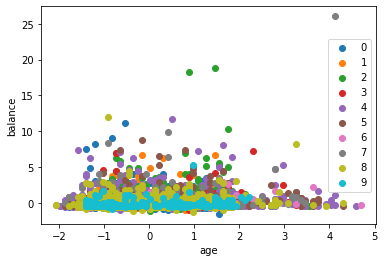

In [15]:
for i in range(10) :
    labels = bank_df_sc[cst_group == i]
    plt.scatter(labels['age'], labels['balance'], label = i)

plt.legend()
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

In [19]:
bank_df_sc['group'] = cst_group
bank_df_sc.head()

,age,default,balance,loan,day,duration,campaign,pdays,previous,y,...,feb,jan,jul,jun,mar,may,nov,oct,sep,group
0,1.647908,-0.137148,0.250618,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,-0.366252,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,0
1,-0.443424,-0.137148,-0.362335,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,-0.366252,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,0
2,-1.489090,-0.137148,-0.451112,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,-0.366252,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,0
3,1.172605,-0.137148,-0.449807,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,-0.366252,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,0
4,-1.584150,-0.137148,-0.482445,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,-0.366252,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,0


In [21]:
print(bank_df_sc['group'].value_counts())

0    1233
4    1147
8    1094
5     917
1     747
2     644
3     464
7     429
9     189
6      69
Name: group, dtype: int64


In [23]:
bank_df_sc[bank_df_sc['group'] == 1].describe()

,age,default,balance,loan,day,duration,campaign,pdays,previous,y,...,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,...,747.000000,7.470000e+02,7.470000e+02,7.470000e+02,747.000000,7.470000e+02,747.000000,747.000000,7.470000e+02,747.0
mean,0.146028,0.012019,0.037426,-0.058645,-0.508413,-0.078723,0.172536,-0.372308,-0.264389,-0.092655,...,-0.267818,-1.674064e-01,-4.347297e-01,2.843677e+00,-0.100262,-6.621040e-01,-0.320275,-0.134949,-1.120725e-01,1.0
std,0.927201,1.042734,0.819960,0.944406,0.905592,0.999956,1.404144,0.271345,0.275039,0.879433,...,0.000000,2.777417e-17,1.110967e-16,4.443868e-16,0.000000,1.110967e-16,0.000000,0.000000,4.166126e-17,0.0
min,-1.869332,-0.137148,-0.997156,-0.444540,-1.758049,-0.964517,-0.574193,-0.418664,-0.310149,-0.366252,...,-0.267818,-1.674064e-01,-4.347297e-01,2.843677e+00,-0.100262,-6.621040e-01,-0.320275,-0.134949,-1.120725e-01,1.0
25%,-0.538484,-0.137148,-0.402807,-0.444540,-1.396049,-0.651428,-0.574193,-0.418664,-0.310149,-0.366252,...,-0.267818,-1.674064e-01,-4.347297e-01,2.843677e+00,-0.100262,-6.621040e-01,-0.320275,-0.134949,-1.120725e-01,1.0
50%,0.031879,-0.137148,-0.235045,-0.444540,-0.551381,-0.394247,-0.238367,-0.418664,-0.310149,-0.366252,...,-0.267818,-1.674064e-01,-4.347297e-01,2.843677e+00,-0.100262,-6.621040e-01,-0.320275,-0.134949,-1.120725e-01,1.0
75%,0.887424,-0.137148,0.136056,-0.444540,0.293287,0.142478,0.097459,-0.418664,-0.310149,-0.366252,...,-0.267818,-1.674064e-01,-4.347297e-01,2.843677e+00,-0.100262,-6.621040e-01,-0.320275,-0.134949,-1.120725e-01,1.0
max,2.883695,7.291369,6.759733,2.249514,1.741289,8.789708,12.858852,3.648753,2.945362,2.730362,...,-0.267818,-1.674064e-01,-4.347297e-01,2.843677e+00,-0.100262,-6.621040e-01,-0.320275,-0.134949,-1.120725e-01,1.0
